In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_train=pd.read_csv("C:\\Users\HEMANJALI MULI\\Downloads\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")
titanic_test=pd.read_csv("C:\\Users\\HEMANJALI MULI\\Downloads\\XGBM & LGBM\\XGBM & LGBM\\Titanic_test.csv")

In [3]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_train=titanic_train.drop(["Name","Ticket","Cabin"],axis=1)

In [9]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Data Preprocessing

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0],inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(),inplace=True)

In [12]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16f6d5ad990>,
 'caps': [<matplotlib.lines.Line2D at 0x16f6d5aee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f6d5acdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f6d5bc210>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f6d5bcb10>],
 'means': []}

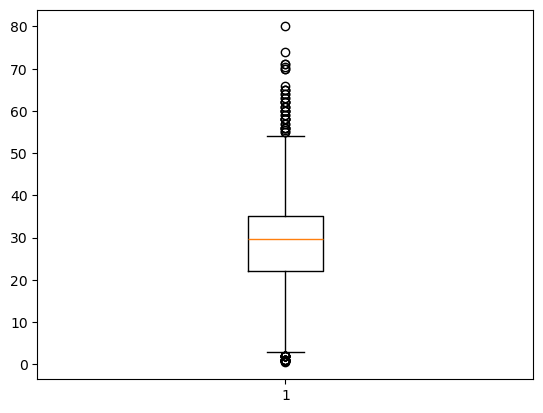

In [13]:
plt.boxplot(titanic_train["Age"])

In [14]:
# Detect and treat outliers (if necessary)
# Using IQR method (adjust thresholds as needed)
Q1 = titanic_train["Age"].quantile(0.25)
Q3 = titanic_train["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train= titanic_train[(titanic_train["Age"] >= lower_bound) & (titanic_train["Age"] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x16f6de275d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16f6de3c510>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f6de363d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f6de3dad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f6de3e510>],
 'means': []}

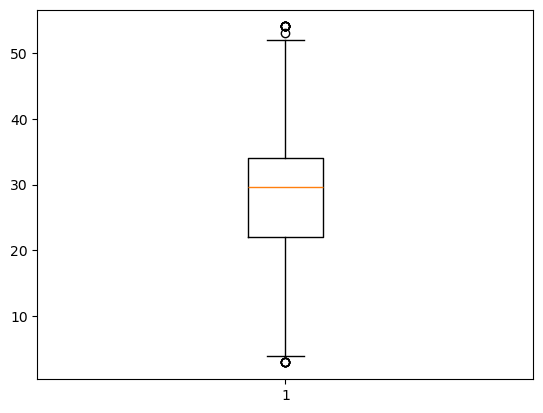

In [15]:
plt.boxplot(titanic_train["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16f6dea1790>,
 'caps': [<matplotlib.lines.Line2D at 0x16f6dea3050>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f6dea0b90>],
 'medians': [<matplotlib.lines.Line2D at 0x16f6deac690>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f6dead0d0>],
 'means': []}

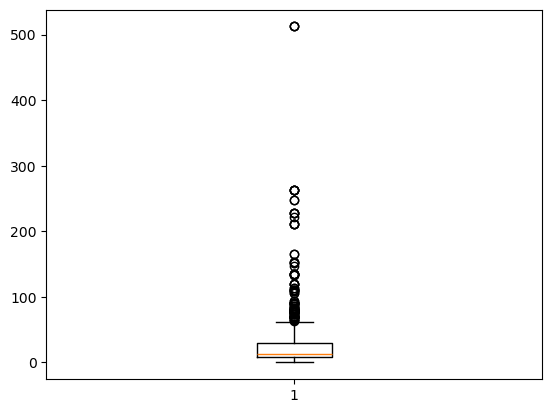

In [16]:
plt.boxplot(titanic_train["Fare"])

In [17]:
Q1 = titanic_train["Fare"].quantile(0.25)
Q3 = titanic_train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train= titanic_train[(titanic_train["Fare"] >= lower_bound) & (titanic_train["Fare"] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x16f6d624750>,
 'caps': [<matplotlib.lines.Line2D at 0x16f6d625fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f6d61bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f6d627590>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f6d634090>],
 'means': []}

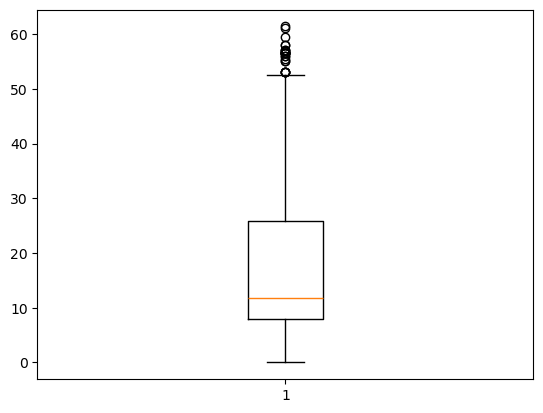

In [18]:
plt.boxplot(titanic_train["Fare"])

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
titanic_train["Pclass"]= label_encoder.fit_transform(titanic_train["Pclass"])
titanic_train["Sex"]= label_encoder.fit_transform(titanic_train["Sex"])
titanic_train["Embarked"]= label_encoder.fit_transform(titanic_train["Embarked"])
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2,1,22.000000,1,0,7.2500,2
2,3,1,2,0,26.000000,0,0,7.9250,2
3,4,1,0,0,35.000000,1,0,53.1000,2
4,5,0,2,1,35.000000,0,0,8.0500,2
5,6,0,2,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
886,887,0,1,1,27.000000,0,0,13.0000,2
887,888,1,0,0,19.000000,0,0,30.0000,2
888,889,0,2,0,29.699118,1,2,23.4500,2
889,890,1,0,1,26.000000,0,0,30.0000,0


In [20]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
titanic_test=titanic_test.drop(["Name","Ticket","Cabin"],axis=1)
titanic_test["Pclass"]= label_encoder.fit_transform(titanic_test["Pclass"])
titanic_test["Sex"]= label_encoder.fit_transform(titanic_test["Sex"])
titanic_test["Embarked"]= label_encoder.fit_transform(titanic_test["Embarked"])
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,2,1,34.5,0,0,7.8292,1
1,893,2,0,47.0,1,0,7.0000,2
2,894,1,1,62.0,0,0,9.6875,1
3,895,2,1,27.0,0,0,8.6625,2
4,896,2,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,2,1,NaN,0,0,8.0500,2
414,1306,0,0,39.0,0,0,108.9000,0
415,1307,2,1,38.5,0,0,7.2500,2
416,1308,2,1,NaN,0,0,8.0500,2


# Data Visualization

<Axes: xlabel='Survived'>

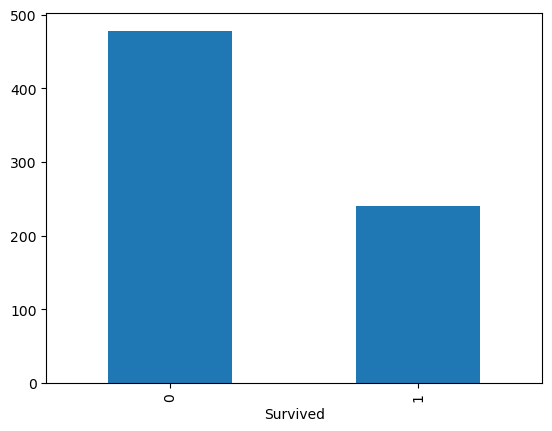

In [22]:
titanic_train["Survived"].value_counts().plot(kind="bar")

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

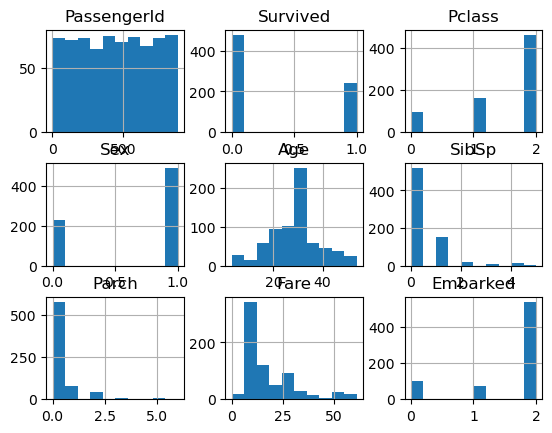

In [23]:
titanic_train.hist()

<Axes: xlabel='Pclass'>

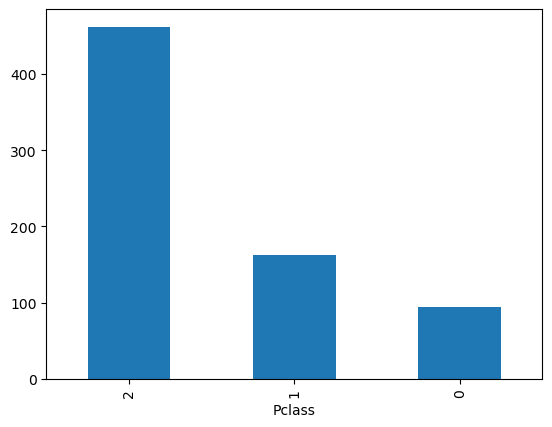

In [24]:
titanic_train["Pclass"].value_counts().plot(kind="bar")

<Axes: xlabel='Sex'>

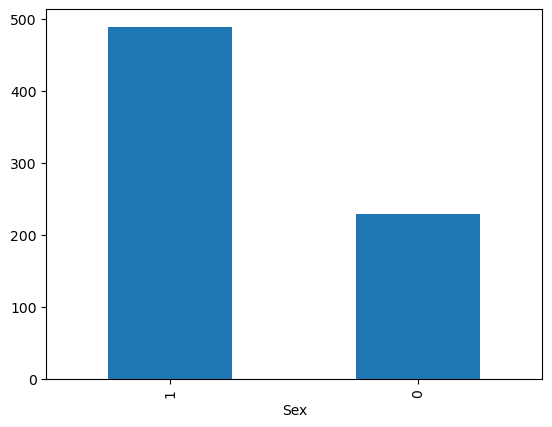

In [25]:
titanic_train["Sex"].value_counts().plot(kind="bar")

<Axes: xlabel='SibSp'>

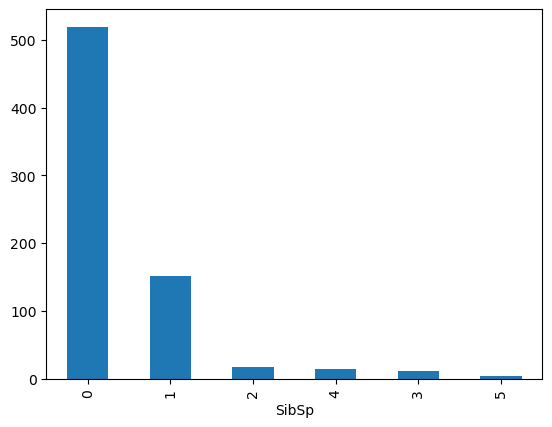

In [26]:
titanic_train["SibSp"].value_counts().plot(kind="bar")

<Axes: xlabel='Parch'>

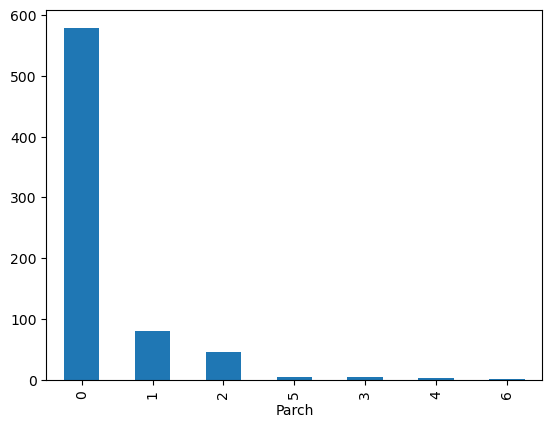

In [27]:
titanic_train["Parch"].value_counts().plot(kind="bar")

<Axes: xlabel='Embarked'>

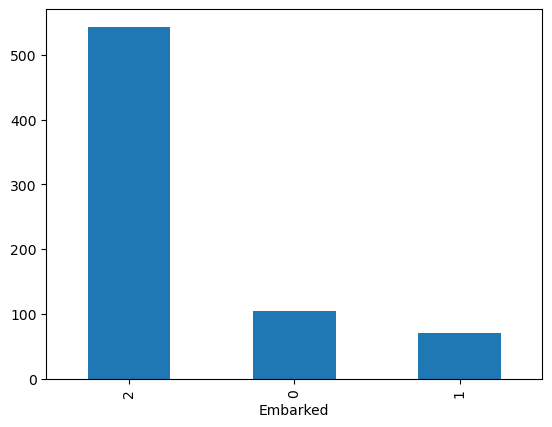

In [28]:
titanic_train["Embarked"].value_counts().plot(kind="bar")

<Axes: xlabel='Survived', ylabel='Fare'>

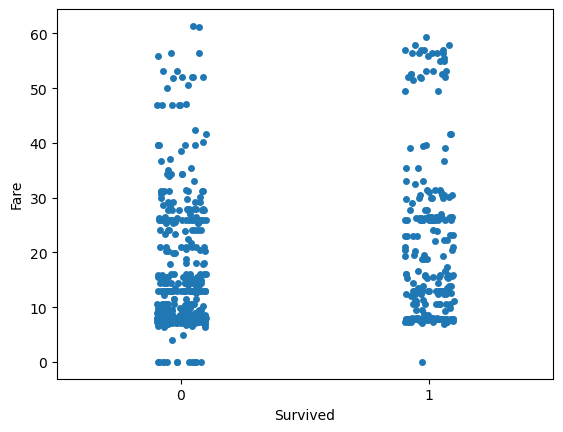

In [29]:
#Grouping with stripplot()
sns.stripplot(x='Survived', y='Fare', data=titanic_train)

<Axes: xlabel='SibSp', ylabel='Fare'>

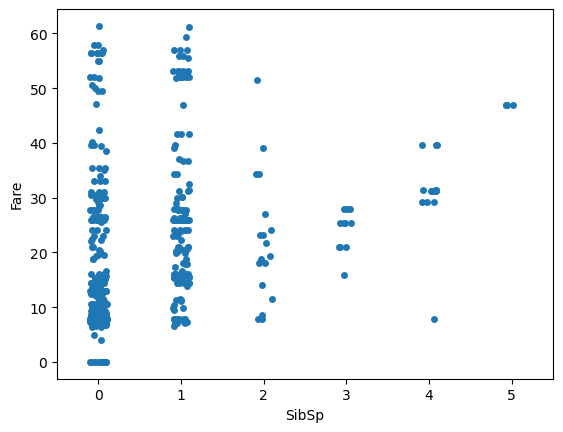

In [30]:
sns.stripplot(x='SibSp', y='Fare', data=titanic_train)

# XGBoost model¶

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
x=titanic_train[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=titanic_train[["Survived"]]

In [34]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [35]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
# make predictions for test data
y_pred = model.predict(x_test)

In [37]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [38]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.56%


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        98
           1       0.71      0.65      0.68        46

    accuracy                           0.81       144
   macro avg       0.78      0.76      0.77       144
weighted avg       0.80      0.81      0.80       144



In [40]:
# predictions for titanic test data
y_pred1 = model.predict(titanic_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Light GBM

In [41]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 5.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.4 MB/s eta 0:00:00


In [42]:
from lightgbm import LGBMClassifier

In [43]:
model1 = LGBMClassifier()
# Train models
model1.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 194, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 574, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337979 -> initscore=-0.672313
[LightGBM] [Info] Start training from score -0.672313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [44]:
#Prediction
lgbm_pred=model1.predict(x_test)

In [45]:
lgbm_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [46]:
accuracy = accuracy_score(y_test,lgbm_pred )
accuracy

0.8333333333333334

In [48]:
print(classification_report(y_test,lgbm_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        98
           1       0.78      0.67      0.72        46

    accuracy                           0.83       144
   macro avg       0.82      0.79      0.80       144
weighted avg       0.83      0.83      0.83       144



In [49]:
# predictions for titanic test data
y_pred2 = model1.predict(titanic_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

# Cross-Validation and Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# LightGBM Grid Search
grid_lgbm = GridSearchCV(LGBMClassifier(), param_grid, cv=5, scoring='accuracy')
grid_lgbm.fit(x_train, y_train)

# XGBoost Grid Search
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 155, number of negative: 304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337691 -> initscore=-0.673603
[LightGBM] [Info] Start training from score -0.673603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [51]:
# Display best parameters and scores
print("Best parameters for LightGBM:", grid_lgbm.best_params_)
print("Best accuracy for LightGBM:", grid_lgbm.best_score_)

print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best accuracy for XGBoost:", grid_xgb.best_score_)

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for LightGBM: 0.8030968726163235
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best accuracy for XGBoost: 0.8030816170861937


# Comparitive Analysis

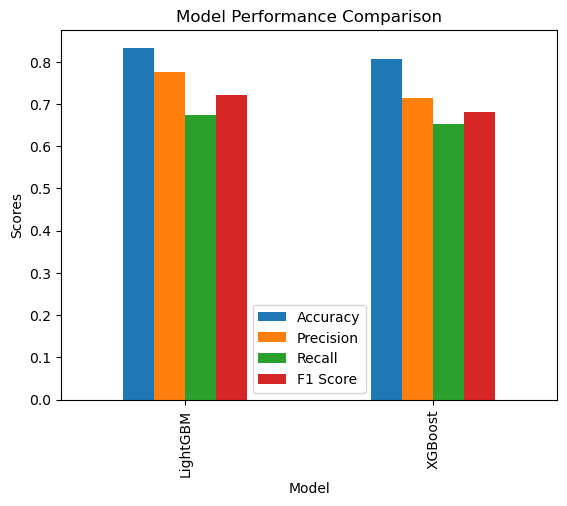

In [52]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
results = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, lgbm_pred), accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, lgbm_pred), precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, lgbm_pred), recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, lgbm_pred), f1_score(y_test, y_pred)]
}

results_df = pd.DataFrame(results)

# Plotting the comparison
results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.show()